In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [16]:
#Load the data set
bank = pd.read_csv("C://Users//Admin//Desktop//Data//Assignments New Ans//bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
#Shape of the data set
bank.shape
bank.head()
bank.info()
bank.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [19]:
bank.isna().sum()
print(bank.shape)

(45211, 17)


In [20]:
# Removing NA values in data set
bank = bank.dropna()
bank.shape


(45211, 17)

In [21]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [22]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [23]:
countNo = len(bank[bank.y == 'no'])
countYes = len(bank[bank.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(bank.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(bank.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


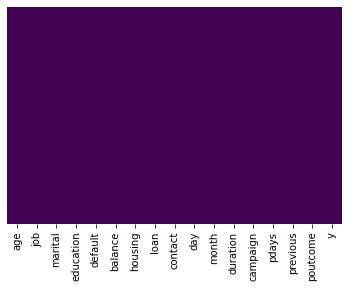

In [24]:
import seaborn as sns
sns.heatmap(bank.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [64]:
#Define X and y
#X = data1.drop('Price', axis = 1).values
#y = data1.iloc[:, 0].values.reshape(-1,1)
#bank1=pd.get_dummies(data=bank,drop_first=True)
#X = bank.drop(['y','job','marital', 'education', 'contact', 
           'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
#Y = bank['y']

#bank1

In [78]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
bank['job']=label_encoder.fit_transform(bank["job"])
bank['marital']=label_encoder.fit_transform(bank["marital"])
bank['education']=label_encoder.fit_transform(bank["education"])
bank['default']=label_encoder.fit_transform(bank["default"])
bank['housing']=label_encoder.fit_transform(bank["housing"])
bank['loan']=label_encoder.fit_transform(bank["loan"])
bank['contact']=label_encoder.fit_transform(bank["contact"])
bank['month']=label_encoder.fit_transform(bank["month"])
bank['poutcome']=label_encoder.fit_transform(bank["poutcome"])
bank['y']=label_encoder.fit_transform(bank["y"])

In [79]:
bank1=bank.iloc[:,[0,1,2,3,4,5,6,7,16]]
bank1

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1
45207,71,5,0,0,0,1729,0,0,1
45208,72,5,1,1,0,5715,0,0,1
45209,57,1,1,1,0,668,0,0,0


In [80]:
X=bank1.iloc[:,:-2]
Y=bank1.iloc[:,-1]

In [81]:
X

,age,job,marital,education,default,balance,housing
0,58,4,1,2,0,2143,1
1,44,9,2,1,0,29,1
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,1
4,33,11,2,3,0,1,0
...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0
45207,71,5,0,0,0,1729,0
45208,72,5,1,1,0,5715,0
45209,57,1,1,1,0,668,0


In [82]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [18]:
#X = pd.get_dummies(X)
#y = pd.get_dummies(Y)

C:\Users\Mohan Kumar\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


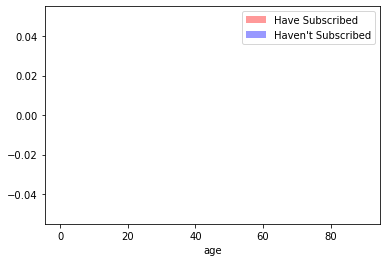

In [83]:
import matplotlib.pyplot as plt
bins = range(0, 100, 10)
ax = sns.distplot(bank.age[bank.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(bank.age[bank.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

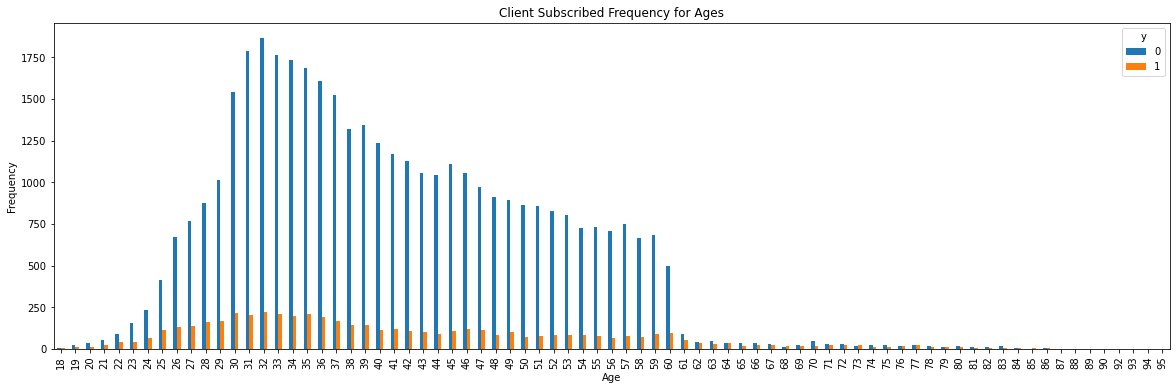

In [84]:
pd.crosstab(bank.age,bank.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

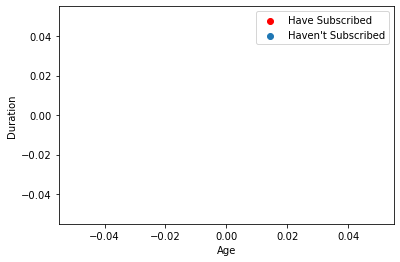

In [85]:
plt.scatter(x=bank.age[bank.y=='yes'], y=bank.duration[(bank.y=='yes')], c="red")
plt.scatter(x=bank.age[bank.y=='no'], y=bank.duration[(bank.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

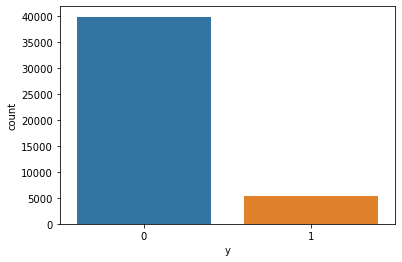

In [86]:
sns.countplot(x='y', data=bank, label='Count')

In [87]:
from sklearn.model_selection import train_test_split
train_X,test_X=train_test_split(X,test_size=0.3)
train_Y,test_Y=train_test_split(Y,test_size=0.3)

In [88]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Mohan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})


In [91]:
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [92]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (cm)

[[39911    11]
 [ 5287     2]]


In [93]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
spec=TN/(TN+FP)
precision=TP/(TP+FP)
print(sensitivity,spec,precision)

0.0003781433163168841 0.9997244627022694 0.15384615384615385


In [94]:
import numpy as np
Accuracy= np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.8828161288182079


In [95]:
cm_test=confusion_matrix(test_Y,classifier.predict(test_X))
print(cm_test)

[[11947     3]
 [ 1614     0]]


In [96]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.15      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.52      0.50      0.47     45211
weighted avg       0.80      0.88      0.83     45211



In [ ]:
# ROC Curve

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new[df_new["fpr"]>=0.22]


,fpr,tpr,cutoff
3477,0.220029,0.364530,0.177016
3478,0.220029,0.364908,0.177008
3479,0.220054,0.365286,0.177006
3480,0.220680,0.365286,0.176860
3481,0.220680,0.365665,0.176849
...,...,...,...
11795,0.999950,0.998676,0.040546
11796,1.000000,0.998676,0.040201
11797,1.000000,0.999244,0.037201
11798,1.000000,0.999622,0.036541


Text(0, 0.5, 'True Positive Rate')

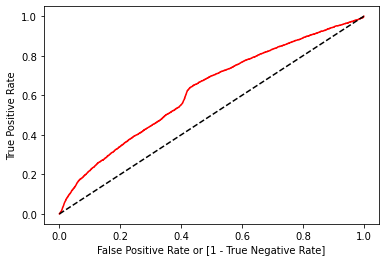

In [98]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [99]:
auc

0.5000513030092931

In [100]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': Y,"pred":0})
new_pred.loc[prob>0.58,"pred"]=1
new_pred

,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [101]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new
print(classification_report(new_pred.actual,new_pred.pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.44      0.50      0.47     45211
weighted avg       0.78      0.88      0.83     45211

